In [36]:
import networkx as nx

In [37]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

# Nodes

### we create an object "G" and we assign a node "1".

In [38]:
G = nx.Graph()
G.add_node(1)

### We add nodes to create a list of nodes.

In [39]:
G.add_nodes_from([2,3])

### When we create a path graph, we create "x" nodes connected by one edge

In [40]:
H = nx.path_graph (10)

### We add all the nodes in H inside G.

In [41]:
G.add_nodes_from (H)

### It is possible also, to use H as a unique node in G.

In [42]:
G.add_node(H)

# Edges

In [43]:
G.add_edge(1,2)

In [44]:
e = (2,3)

In [45]:
G.add_edge(*e) #unpack edge tuple*

In [46]:
G.add_edges_from ([(1,2), (1,3)])

In [47]:
G.add_edges_from (H.edges())

### To remove a graph only put "remove" before the same commands that we used to create it.

In [48]:
G.remove_node(H)

In [49]:
G.clear()

### We can now add new nodes/edges

In [50]:
G.add_edges_from([(1,2), (1,3)])

In [51]:
G.add_node(1)

In [52]:
G.add_edge (1,2)

In [53]:
G.add_node ("spam") #adds the node "spam"

In [54]:
G.add_nodes_from ("spam") #adds 4 nodes: 's', 'p', 'a', 'm'

In [55]:
G.number_of_nodes() #1,2,3, spam, s, p, a,m

8

In [56]:
G.number_of_edges()

2

In [57]:
list (G.nodes()) #returns an iterator of nodes

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [58]:
list(G.edges()) #returns an iterator of edges

[(1, 2), (1, 3)]

In [59]:
list(G.adj[1]) #returns an iterator of neighboring

[2, 3]

In [60]:
G.remove_nodes_from ("spam")

In [61]:
G.remove_edge (1,3)

In [62]:
list (G.nodes())

[1, 2, 3, 'spam']

In [66]:
H = nx.DiGraph(G) #create a Digraph using the connections from G

In [67]:
list(H.edges())

[(1, 2), (2, 1)]

In [68]:
edgelist = [(0,1), (1,2), (2,3)]

In [69]:
H = nx.Graph (edgelist)

In [70]:
G[1]

{2: {}}

In [71]:
G[1][2]

{}

### {1: {2 : {   } } } The "1" is the Key. From "2" to the end is the "value". "2" is the neighbor. And the tuple after "2" is the Atribute

In [72]:
G.add_edge(1,3)

In [73]:
G[1][3]['color']='blue'

G[1]

{2: {}, 3: {'color': 'blue'}}

In [80]:
FG = nx.Graph()

In [81]:
FG.add_weighted_edges_from ([(1,2,0.125), (1,3,0.75), (2,4,1.2), (3,4,0.375)])

### {1: {2 : { } } } The "1" is the "n". From "2" to the end is the ""nbrs". "2" is the nbr. And the tuple after "2" is the Atribute (attr)

In [92]:
print(FG.adj.items())

dict_items([(1, {2: {'weight': 0.125}, 3: {'weight': 0.75}}), (2, {1: {'weight': 0.125}, 4: {'weight': 1.2}}), (3, {1: {'weight': 0.75}, 4: {'weight': 0.375}}), (4, {2: {'weight': 1.2}, 3: {'weight': 0.375}})])


In [82]:
for n, nbrs in FG.adj.items():
    for nbr, attr in nbrs.items():
        data = attr['weight']
        if data < 0.5:
            print ('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


### As the nodes and their neighbours are pairs, we have the results doubled. If we analyse the edge, we get only a unique value including the both nodes with d< 0.5.

### Note that "%.3f" means a float with 3 decimals.

### convenient access to all edges is achieved with the edges method

In [83]:
for (u, v, d) in FG.edges(data = 'weight'):
    if d < 0.5:
        print ('(%d, %d, %.3f)' % (u, v, d))

(1, 2, 0.125)
(3, 4, 0.375)


### Graph Atributtes

In [84]:
G = nx.Graph (day = 'Friday')

In [86]:
G.graph

{'day': 'Friday'}

### Node Attributes

In [87]:
G.add_node(1, time='5pm')

In [88]:
G.add_nodes_from([3], time = '2pm')

In [89]:
G.node [1]

{'time': '5pm'}

In [90]:
G.node[1]['room']=714

In [91]:
list (G.nodes(data=True))

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

### Multigraph

In [94]:
MG = nx.MultiGraph ()

In [95]:
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)] )

In [96]:
list (MG.degree()) #MG.degree() returns a (node, degree) iterator

[1, 2, 3]

In [97]:
GG = nx.Graph()

In [98]:
for n,nbrs in MG.adjacency_iter():
    for nbr,edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

In [99]:
nx.shortest_path(GG,1,3)

[1, 2, 3]

In [100]:
import matplotlib.pyplot as plt

In [101]:
nx.draw_networkx(G)

/Users/sergi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


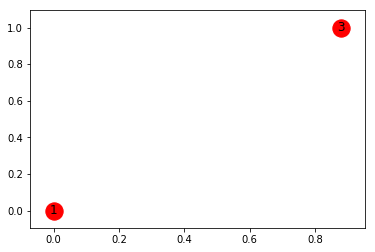

In [102]:
plt.show()

In [104]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [105]:
#Quick snapshot of the network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


### average degree = connections between users

In [106]:
#create network layout for visualizations
spring_pos = nx.spring_layout (G_fb)

In [107]:
plt.axis ("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, linewidths = 1, node_size = 35)

/Users/sergi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/sergi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


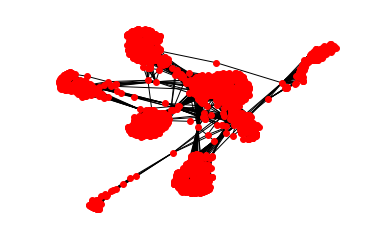

In [108]:
plt.show()

In [110]:
G_fb[594]

{414: {}, 428: {}, 563: {}, 667: {}, 3980: {}, 3989: {}, 4011: {}, 4031: {}}

In [111]:
G_fb[860]

{698: {}, 1684: {}}

In [113]:
#what is the average shortest path length?
nx.average_shortest_path_length(G_fb)

3.6925068496963913

### the previous function shows you the average of the shortest path to connect an user with another user. Each distance between 2 users linked with a common edge has the value of "1".

In [116]:
import random

node_sample = random.sample (G_fb.nodes(), 100)

total = 0.0
for n1 in node_sample:
    for n2 in node_sample:
        if n1 != n2:
            total += nx.shortest_path_length (G_fb, n1, n2)
(total/(100*99))

3.8494949494949493